## Bibliotecas

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing(True)

## Variáveis

In [11]:
Bx, By = symbols('B_x B_y')
x, y, z, k = symbols('x y z k')
An, Bn, Cn = symbols('A_n B_n C_n')
r, R1, R2, Rc = symbols('r R1 R2 R_c')
w, t, delta = symbols('omega, t, delta')
n, n0, Rref = symbols('n, n_0, R_ref')
B_r, B_theta = symbols('B_r, B_theta')
phi, phi_t, theta, Delta = symbols('phi, phi_t, theta Delta')
V, N, L = symbols('V N L')
n0 = 1

## Equações do Br e Btheta

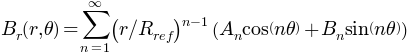

In [15]:
BrFuncao = (Bn*sin((n-n0+1)*theta)+An*cos((n-n0+1)*theta))*(r/Rref)**(n-n0)
Br = Eq(B_r(r, theta),Sum(BrFuncao,(n,n0,oo)))
Br

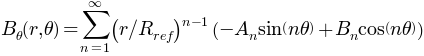

In [17]:
Btheta = (Bn*cos((n-n0+1)*theta)-An*sin((n-n0+1)*theta))*(r/Rref)**(n-n0)
Bt = Eq(B_theta(r,theta),Sum(Btheta,(n,n0,oo)))
Bt

## Informes Úteis

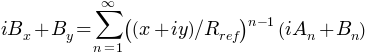

In [19]:
Eq((By+I*Bx),Sum((Bn+I*An)*((x+I*y)/Rref)**(n-n0),(n,n0,oo)))

In [20]:
tt = Eq(theta,w*t + delta)
tt

In [21]:
Cn_eq = Eq(Cn,Bn+I*An)
Cn_eq

# Sinal a partir de um bobina radial

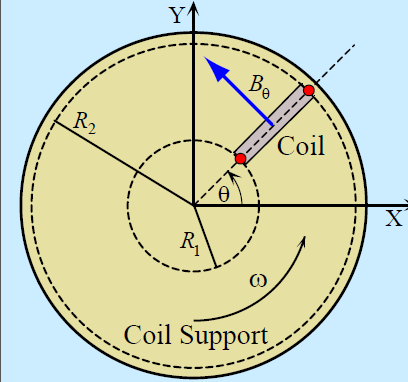

In [1]:
from IPython.display import Image
Image(filename='D:\ARQ\Imagens\Bobina_Radial.png')


## Fluxo através da bobina no tempo t

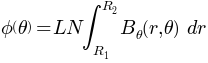

In [35]:
Flux = Eq(phi(theta),N*L*Integral(B_theta(r, theta),(r,R1,R2)))
Flux

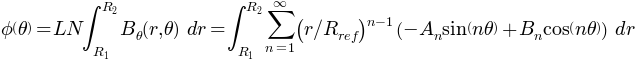

In [41]:
FluxI = Eq(phi(theta),L*N*Integral(Bt,(r,R1,R2)))
FluxI

### Retirando o somatório da Integral e calculando a Integral

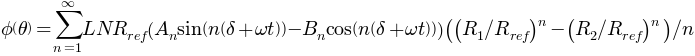

In [107]:
integralpart = Integral(Btheta,(r,R1,R2))
flux = N*L*integralpart.doit(conds='separate').simplify().subs(theta, tt.rhs)
#flux
FuncFlux = Eq(phi(theta),Sum((flux),(n,n0,oo)))
FuncFlux


## Sinal de tensão no tempo t:

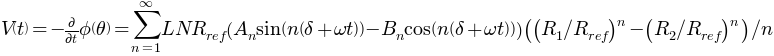

In [76]:
Eq(V(t),-diff(FuncFlux,t))

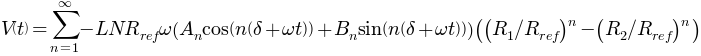

In [86]:
voltsfunc = -diff(flux,t).simplify()
voltsfunc
Volts = Eq(V(t),Sum(voltsfunc,(n,n0,oo)))
Volts

## A tensão integrada no tempo t:

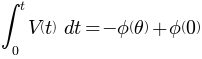

In [98]:
integr = Integral(Volts.lhs,(t,0,t))
Eq(integr,phi(0)-phi(theta))


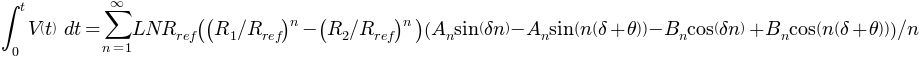

In [109]:
intintegral = Integral(voltsfunc,(t,0,t))
intintegral = intintegral.doit(conds='separate').simplify()
intVolts = Eq(Integral(Volts.lhs,(t,0,t)),Sum(intintegral,(n,n0,oo)))
intVolts = intVolts.subs(w*t,theta)
intVolts


# Sinal a partir da bobina tangencial

## Fluxo através da bobina no tempo t:

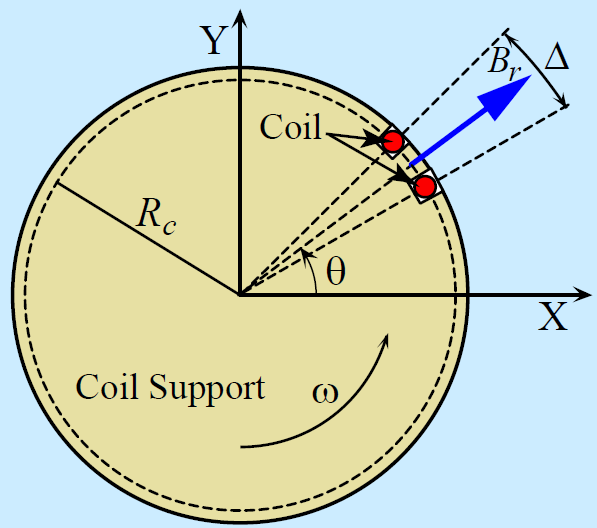

In [1]:
from IPython.display import Image
Image(filename='D:\ARQ\Imagens\Bobina Tangencial.png')


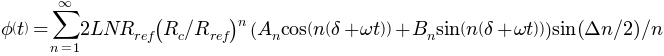

In [115]:
Eq(phi(t),N*L*Integral(BrFuncao.subs(r,Rc)*Rc,(theta,theta-Delta/2,theta+Delta/2)))
integralparte = Integral(BrFuncao.subs(r,Rc)*Rc,(theta,theta-Delta/2,theta+Delta/2))
fluxtang = N*L*integralparte.doit(conds='separate').simplify().subs(theta,tt.rhs)
FluxEq = Eq(phi(t),Sum(fluxtang,(n,n0,oo)))
FluxEq

## Sinal de tensão no tempo t:

In [116]:
Eq(Volts.lhs,-diff(FluxEq.lhs))

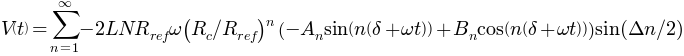

In [119]:
deriva = -diff(fluxtang,t).simplify()
Eq(Volts.lhs,Sum(deriva,(n,n0,oo)))

## A tensão integrada no tempo t:

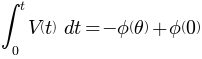

In [120]:
Eq(Integral(Volts.lhs,(t,0,t)),phi(0)-phi(theta))

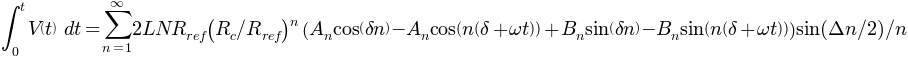

In [124]:
funcIntTan = Integral(deriva,(t,0,t)).doit(conds='separate').simplify()
#funcIntTan
Int_Voltage_Tan = Eq(Integral(Volts.lhs,(t,0,t)),Sum(funcIntTan,(n,n0,oo)))
Int_Voltage_Tan
